# Вывести на графике
1 эмпирические функции распределения столбцов, \
2 ящики с усами и скрипичные диаграммы, \
3 гистограммы, \
4 диаграммы рассеяния с указанием класса, \
5 графики двумерных плотностей распределения, \
6 комбинированные диаграммы по стандартизованным данным.


#### Импорты

In [31]:
import warnings
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

warnings.filterwarnings("ignore")

#### Загрузка данных

In [68]:
FILENAME = "lab_4.xlsx"
DATAPATH = Path() / "data" / FILENAME

df_input = pd.read_excel(DATAPATH, sheet_name="7", index_col=0, header=0)
df_input.rename(columns={"Класс": "class"}, inplace=True)
df = df_input.drop(columns=["class"])
df_input

,class,x1,x2,x3,x4
0,1,0.377253,2.534024,1.527952,1.617931
1,2,0.862493,4.088941,0.726923,1.789076
2,1,2.347881,-3.515605,1.907470,-0.021225
3,1,0.633584,-4.042076,0.842390,-0.193015
4,2,4.785622,-2.154030,0.699527,0.906914
...,...,...,...,...,...
195,2,4.908169,-7.690565,0.886984,-0.361755
196,2,4.636358,-2.482248,0.174238,1.807313
197,1,0.381155,-1.454510,-0.033821,0.879739
198,2,3.062709,-3.652407,-0.311300,1.392013


#### 1. Эмпирические функции распределения столбцов

[]

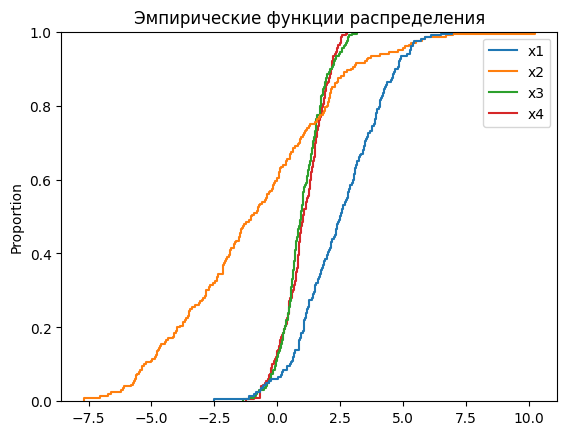

In [41]:
sns.ecdfplot(df).set_title("Эмпирические функции распределения")
plt.plot()

#### 2. Ящики с усами и скрипичные диаграммы

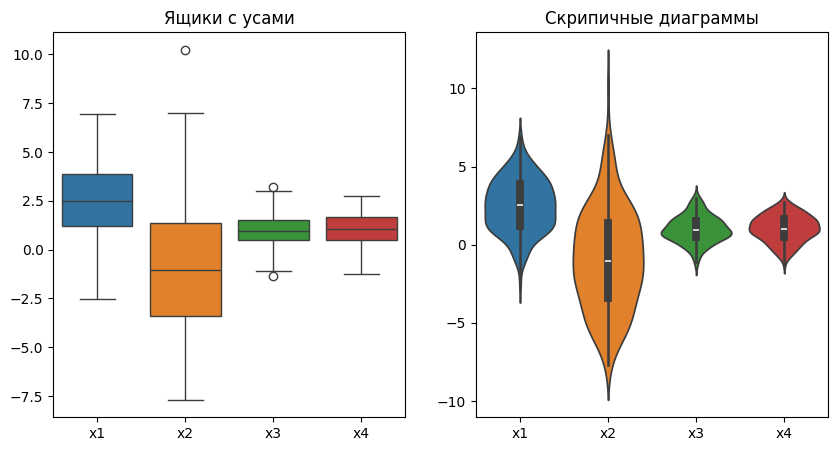

In [40]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.boxplot(data=df, orient="v").set_title("Ящики с усами")

plt.subplot(1, 2, 2)
sns.violinplot(data=df, orient="v").set_title("Скрипичные диаграммы")

plt.show()

#### 3. Гистограммы

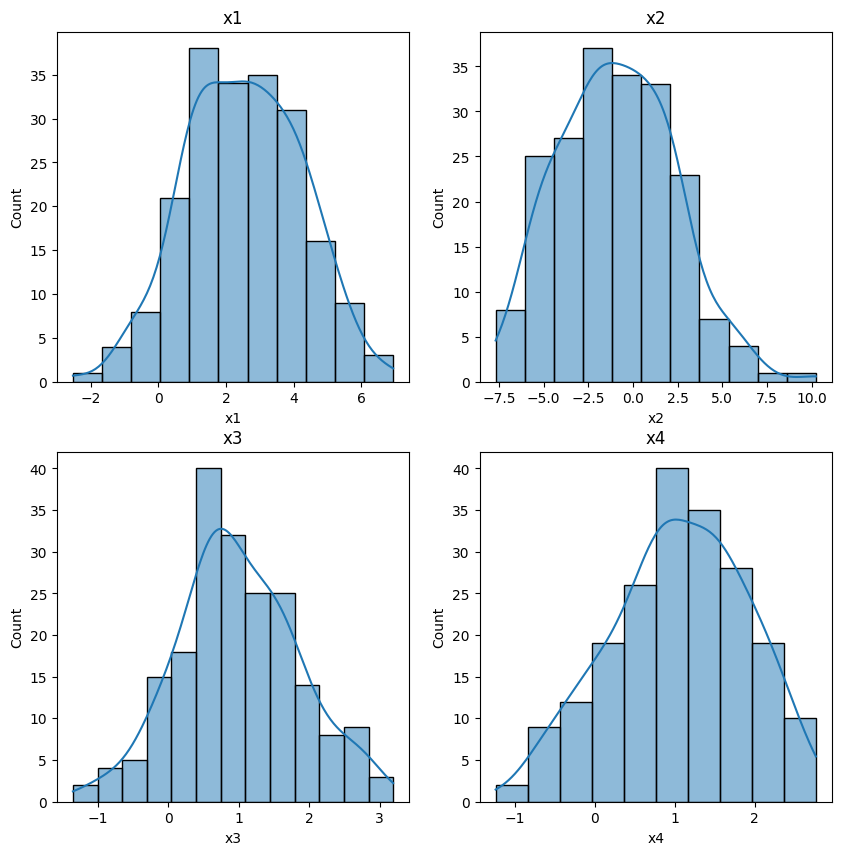

In [37]:
plt.figure(figsize=(10, 10))
for i, col in enumerate(df.columns, start=1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True).set_title(col)

#### 4. Диаграммы рассеяния с указанием класса

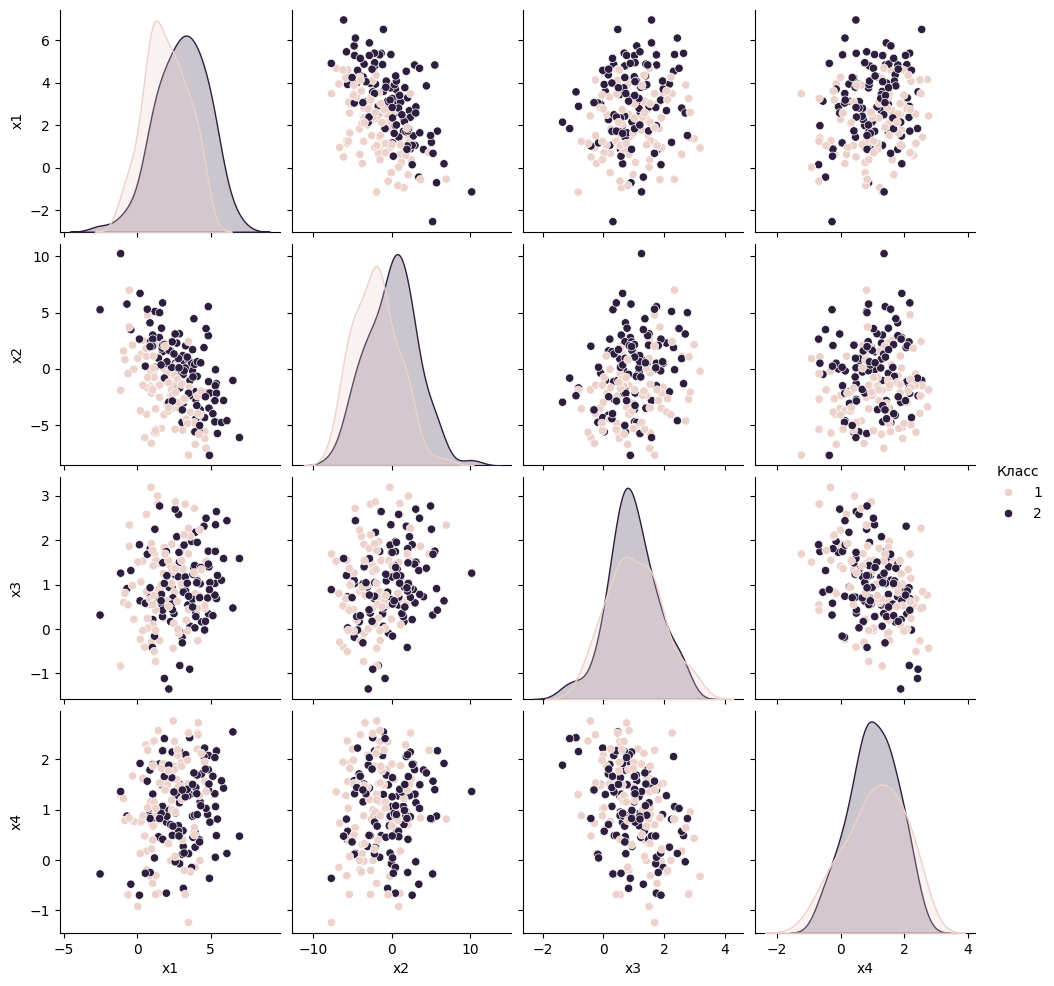

In [44]:
sns.pairplot(df_input, hue="Класс")
plt.show()

#### 5. Графики двумерных плотностей распределения

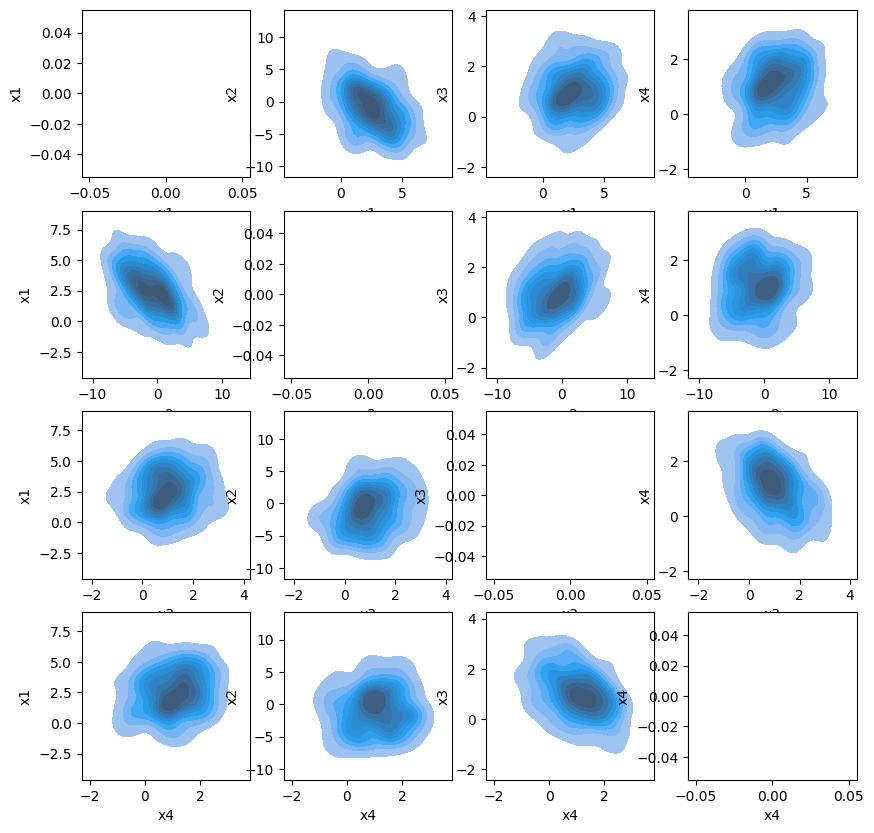

In [33]:
plt.figure(figsize=(10, 10))
for i, col1 in enumerate(df.columns, start=1):
    for j, col2 in enumerate(df.columns, start=1):
        plt.subplot(4, 4, i * 4 + j - 4)
        sns.kdeplot(x=df[col1], y=df[col2], fill=True)

#### 6. Комбинированные диаграммы по стандартизованным данным

Разбиание данных

In [85]:
zhopa = pd.melt(df_input, id_vars=["class"], value_vars=df.columns)
zhopa

,class,variable,value
0,1,x1,0.377253
1,2,x1,0.862493
2,1,x1,2.347881
3,1,x1,0.633584
4,2,x1,4.785622
...,...,...,...
795,2,x4,-0.361755
796,2,x4,1.807313
797,1,x4,0.879739
798,2,x4,1.392013


Построение диаграмм

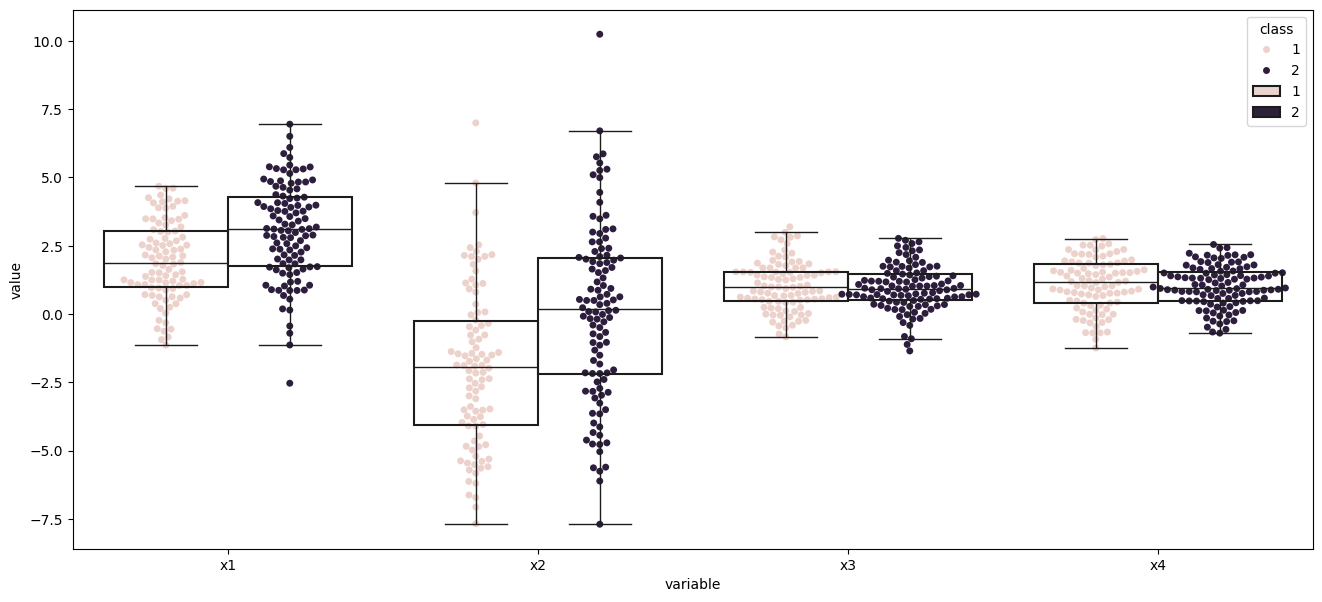

In [84]:
plt.figure(figsize=(16, 7))
plt_1 = sns.swarmplot(data=zhopa, x="variable", y="value", hue="class", dodge=True)
plt_2 = sns.boxplot(
    data=zhopa, 
    x="variable", 
    y="value", 
    hue="class", 
    showcaps=True, 
    boxprops={
        "facecolor": "None",
        "linewidth": 1.5,
        "zorder": 10
    },
    showfliers=False, 
    whiskerprops={
        "linewidth": 1,
        "zorder": 10
    }, 
    ax=plt_1,
    zorder=10
)